# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,auc

# Importing The Dataset

In [2]:
df = pd.read_csv('data_1.csv')

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
1,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
2,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
3,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1
4,131,0.005,0.072,0.008,0.003,0.0,0.0,28,1.4,0,12.9,66,88,154,5,0,135,134,137,7,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1450 non-null   int64  
 1   accelerations                                           1450 non-null   float64
 2   fetal_movement                                          1450 non-null   float64
 3   uterine_contractions                                    1450 non-null   float64
 4   light_decelerations                                     1450 non-null   float64
 5   severe_decelerations                                    1450 non-null   float64
 6   prolongued_decelerations                                1450 non-null   float64
 7   abnormal_short_term_variability                         1450 non-null   int64  
 8   mean_value_of_short_term_variability  

No Missing Values

In [5]:
df.isna().any().any()

False

# Splitting the dataset

In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
y = label_binarize(y,classes=[1,2,3])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Classifying using DecisionTreeClassifier

In [7]:
def compute_metrics(model):
  y_pred = model.predict(X_test)
  print("Accuracy ",accuracy_score(y_test,y_pred))
  print("Precision ", precision_score(y_test,y_pred,average='micro'))
  print("Recall ",recall_score(y_test,y_pred,average='micro'))

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(3):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  for i in range(3):
      plt.plot(fpr[i], tpr[i],label='ROC curve of class {0} (area = {1:0.2f})'.format(i+1, roc_auc[i]))

  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('AUC-ROC Curve')
  plt.legend()
  plt.show()

Accuracy  0.9413793103448276
Precision  0.9413793103448276
Recall  0.9413793103448276


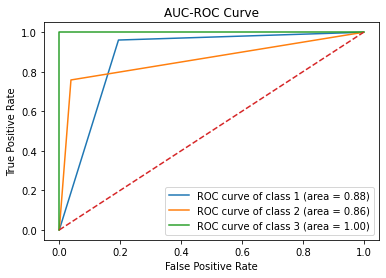

In [8]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train,y_train)
compute_metrics(decision_tree)

In [9]:
from sklearn import tree
fig = plt.figure(figsize=(200,200))
_ = tree.plot_tree(decision_tree,feature_names=df.columns[:-1],filled=True)
fig.savefig("DT_A_1.png")

Output hidden; open in https://colab.research.google.com to view.